# Running gridded DBPM run
**Author**: Denisse Fierro Arcos  
**Date**: 2024-11-01

In [3]:
# from glob import glob
# import datetime as dt
import os
os.chdir('/g/data/vf71/la6889/lme_scale_calibration_ISMIP3a/new_workflow/')

In [2]:
import xarray as xr
import json
import pandas as pd
import numpy as np
import useful_functions as uf
from dask.distributed import Client

In [3]:
#Gridded 
gridded_params = json.load(open('gridded_params_testing_python.json'))

dict_keys(['timesteps_years', 'numb_time_steps', 'effort', 'fish_mort_pred', 'fish_mort_detritivore', 'hr_volume_search', 'detritus_coupling', 'log10_pred_prey_ratio', 'log_prey_pref', 'hr_vol_filter_benthos', 'metabolic_req_pred', 'metabolic_req_detritivore', 'defecate_prop', 'growth_prop', 'def_low', 'high_prop', 'growth_pred', 'growth_detritivore', 'growth_detritus', 'energy_pred', 'energy_detritivore', 'handling', 'dynamic_reproduction', 'c1', 'activation_energy', 'boltzmann', 'natural_mort', 'size_senescence', 'exp_senescence_mort', 'const_senescence_mort', 'log_size_increase', 'log10_size_bins', 'numb_size_bins', 'ind_min_pred_size', 'ind_min_detritivore_size', 'idx_new', 'ind_min_fish_pred', 'ind_min_fish_det', 'idx', 'init_pred', 'init_detritivores', 'init_detritus'])

In [7]:
# dbpm_input = pd.read_parquet(
#     os.path.join('/g/data/vf71/la6889/lme_scale_calibration_ISMIP3a/data',
#                  'dbpm_clim-fish-inputs_fao-58_1841-2010.parquet'))
# dbpm_input = dbpm_input[dbpm_input.year == 1961].reset_index(drop = True)

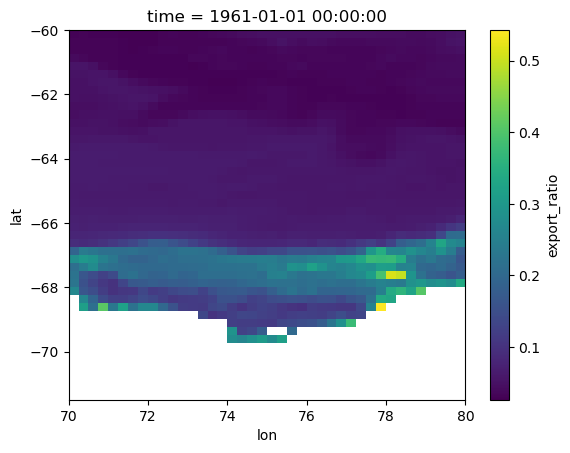

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/dask/_task_spec.py:740: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/dask/_task_spec.py:740: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/dask/_task_spec.py:740: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/dask/_task_spec.py:740: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/dask/_task_spec.py:740: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)
/g/data/hh5/public/apps/minico

In [3]:
sinking_rate = xr.open_zarr(os.path.join(
    '/g/data/vf71/la6889/dbpm_inputs/east_antarctica/gridded', 
    'gfdl-mom6-cobalt2_obsclim_er_15arcmin_fao-58_monthly_1961_2010.zarr/'))
sinking_rate = (sinking_rate['export_ratio'].sel(time = '1961').
                sel(lat = slice(-60, None), lon = slice(70, 80)))
sinking_rate.isel(time = 0).plot()

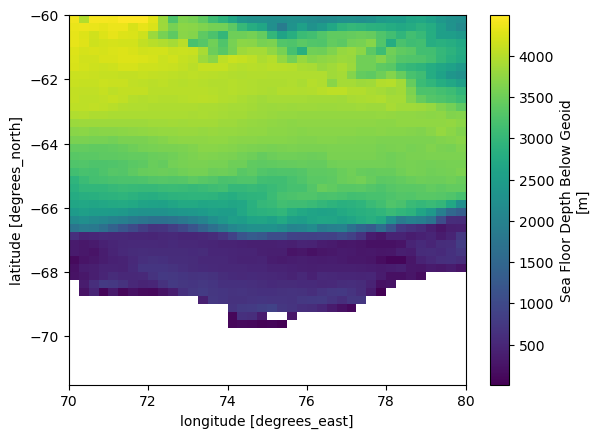

In [8]:
depth = xr.open_zarr(os.path.join(
    '/g/data/vf71/la6889/dbpm_inputs/east_antarctica/gridded', 
    'gfdl-mom6-cobalt2_obsclim_deptho_15arcmin_fao-58_fixed.zarr/'))['deptho']
depth = depth.sel(lat = slice(-60, None), lon = slice(70, 80))
depth.plot()

In [6]:
log10_size_bins_mat = xr.open_zarr('outputs/log10_size_bins_matrix.zarr/')['size_bins']
log10_size_bins_mat

<xarray.DataArray 'size_bins' (size_class: 181)> Size: 1kB
dask.array<open_dataset-size_bins, shape=(181,), dtype=float64, chunksize=(181,), chunktype=numpy.ndarray>
Coordinates:
  * size_class  (size_class) float64 1kB -12.0 -11.9 -11.8 -11.7 ... 5.8 5.9 6.0

## Parameters from `sizemodel` function

In [11]:
ERSEM_det_input = False
# temp_effect = True
# use_init = True

In [ ]:
log10_size_bins = np.array(gridded_params['log10_size_bins'])
# size of individuals found in the model
size_bin_vals = 10**log10_size_bins_mat
time_init = predators.time.values

In [192]:
#Multipliers that do not require iteration
#Size bin related
size_multi = size_bin_vals*gridded_params['log_size_increase']

#To be applied to feeding rates for pelagics and benthic groups
feed_mult_pel = (gridded_params['hr_volume_search']*
                 (10**(log10_size_bins_mat*gridded_params['metabolic_req_pred']))*
                 pref_pelagic)

feed_mult_ben = (gridded_params['hr_volume_search']*
                 (10**(log10_size_bins_mat*gridded_params['metabolic_req_pred']))*
                pref_benthos)

In [194]:
growth_int_pred = xr.zeros_like(predators)
reprod_pred = xr.zeros_like(predators)
pred_mort_pred = xr.zeros_like(predators)
tot_mort_pred = xr.zeros_like(predators)

growth_det = xr.zeros_like(detritivores)
reprod_det = xr.zeros_like(detritivores)
pred_mort_det = xr.zeros_like(detritivores)
tot_mort_det = xr.zeros_like(detritivores)

# Time loop starts here

In [197]:
for i in range(0, numb_time_steps):
    t = sinking_rate.time[i].values
    ts = time_init[i]
    print(i, t, ts)

0 1961-01-01 00:00:00 1959-12-01T00:00:00.000000000
1 1961-02-01 00:00:00 1960-01-01T00:00:00.000000000
2 1961-03-01 00:00:00 1960-02-01T00:00:00.000000000
3 1961-04-01 00:00:00 1960-03-01T00:00:00.000000000
4 1961-05-01 00:00:00 1960-04-01T00:00:00.000000000
5 1961-06-01 00:00:00 1960-05-01T00:00:00.000000000
6 1961-07-01 00:00:00 1960-06-01T00:00:00.000000000
7 1961-08-01 00:00:00 1960-07-01T00:00:00.000000000
8 1961-09-01 00:00:00 1960-08-01T00:00:00.000000000
9 1961-10-01 00:00:00 1960-09-01T00:00:00.000000000
10 1961-11-01 00:00:00 1960-10-01T00:00:00.000000000
11 1961-12-01 00:00:00 1960-11-01T00:00:00.000000000


In [195]:
i = 0
t = sinking_rate.time[i].values
ts = time_init[i]
pred_short = predators.sel(time = ts)
detrit_short = detritivores.sel(time = ts)

In [196]:
if i+1 < numb_time_steps:
    fish_bio_pred = (pred_short.isel(size_class = slice(ind_min_fish_pred, -1))*
                     size_multi).sum('size_class')
    fish_bio_det = (detrit_short.isel(size_class = slice(ind_min_fish_det, -1))*
                     size_multi).sum('size_class')
    
    prop_b = ((fish_bio_pred+fish_bio_det))/(fish_bio_pred+fish_bio_det).sum()
    prop_b = prop_b.drop_vars('time')

    new_effort = uf.gravitymodel(effort.isel(time = i+1), prop_b, depth, 1)

    #Assign new effort values
    effort = xr.where(effort.time == effort.time[i+1], new_effort, effort)

    #Calculate new fishing mortality
    fishing_mort_pred = xr.where(
        fishing_mort_pred.time == fishing_mort_pred.time[i+1],
        fishing_mort_pred*new_effort, fishing_mort_pred)
    fishing_mort_det = xr.where(
        fishing_mort_det.time == fishing_mort_det.time[i+1],
        fishing_mort_det*new_effort, fishing_mort_det)
                                 

    #Remove variable not in use
    del new_effort

In [197]:
pred_growth = ((pred_short*log_size_increase).dot(constant_growth).
               rename({'sc': 'size_class'}))*feed_mult_pel
feed_rate_pel = (pel_tempeffect.sel(time = t)*
                 (pred_growth/(1+gridded_params['handling']*pred_growth)))

In [198]:
detrit_growth = ((detrit_short*log_size_increase).dot(constant_growth).
                 rename({'sc': 'size_class'}))*feed_mult_ben
feed_rate_bent = (pel_tempeffect.sel(time = t)*
                  (detrit_growth/(1+gridded_params['handling']*detrit_growth)))

In [199]:
detritus_multiplier = ((1/size_bin_vals)*
                       gridded_params['hr_vol_filter_benthos']*
                       10**(log10_size_bins_mat*metabolic_req_detritivore)*
                       detritus.sel(time = ts))
feed_rate_det = (ben_tempeffect.sel(time = t)*detritus_multiplier/
                 (1+gridded_params['handling']*detritus_multiplier))

In [200]:
calcs = (growth_prop*(gridded_params['growth_pred']*feed_rate_pel)+high_prop*
         (gridded_params['growth_detritivore']*feed_rate_bent))
growth_int_pred = xr.where(growth_int_pred.time == ts, calcs, growth_int_pred)

del calcs

In [201]:
if gridded_params['dynamic_reproduction']:
    calcs = (growth_prop*(1-(np.array(gridded_params['growth_pred'])+
                             gridded_params['energy_pred']))*
             feed_rate_pel+growth_prop*
             (1-(np.array(gridded_params['growth_detritivore'])+
                 gridded_params['energy_detritivore']))*feed_rate_bent)
    reprod_pred = xr.where(reprod_pred.time == ts, calcs, reprod_pred)
    del calcs

In [202]:
sat_pel = xr.where(feed_rate_pel > 0, feed_rate_pel/pred_growth, 0)

In [203]:
calcs = ((pref_pelagic*gridded_params['hr_volume_search']*
          met_req_log10_size_bins)*
         ((pred_short*sat_pel*log_size_increase).dot(constant_mortality).
          rename({'sc': 'size_class'})))
pred_mort_pred = xr.where(pred_mort_pred.time == ts, calcs, pred_mort_pred)
del calcs

In [204]:
calcs = (pred_mort_pred.sel(time = ts)+pel_tempeffect.sel(time = t)*
         other_mort_pred+senes_mort_pred+fishing_mort_pred.sel(time = ts))
tot_mort_pred = xr.where(tot_mort_pred.time == ts, calcs, tot_mort_pred)
del calcs

In [205]:
calcs = high_prop*(gridded_params['growth_detritus']*feed_rate_det)
growth_det = xr.where(growth_det.time == ts, calcs, growth_det)
del calcs

In [206]:
if gridded_params['dynamic_reproduction']:
    calcs = (high_prop*(1-(np.array(gridded_params['growth_detritus'])+
                           gridded_params['energy_detritivore']))*
             feed_rate_det)
    reprod_det = xr.where(reprod_det.time == ts, calcs, reprod_det)
    del calcs

In [207]:
calcs = ((gridded_params['hr_volume_search']*
          (10**(log10_size_bins_mat*metabolic_req_detritivore))*
          pref_benthos)*
         ((detrit_short*log_size_increase).dot(constant_growth).
          rename({'sc': 'size_class'})))
sat_ben = xr.where(feed_rate_bent > 0, feed_rate_bent/calcs, 0)
del calcs

In [208]:
calcs = xr.where(sat_ben > 0, 
                 (((pref_benthos*gridded_params['hr_volume_search']*
                    met_req_log10_size_bins))*
                  ((pred_short*sat_ben*log_size_increase).
                   dot(constant_mortality).rename({'sc': 'size_class'}))), 
                 0)

pred_mort_det = xr.where(pred_mort_det.time == ts, calcs, pred_mort_det)
del calcs

In [209]:
calcs = (pred_mort_det.sel(time = ts)+ben_tempeffect.sel(time = t)*
         other_mort_det+senes_mort_det+fishing_mort_det.sel(time = ts))

tot_mort_det = xr.where(tot_mort_det.time == ts, calcs, tot_mort_det)
del calcs

In [210]:
eatenbypred = (size_bin_vals*feed_rate_pel*pred_short+
               size_bin_vals*feed_rate_bent*pred_short)

In [211]:
output_w = (size_bin_vals*feed_rate_det*detrit_short*
            log_size_increase).sum('size_class')

In [212]:
defbypred = (gridded_params['defecate_prop']*feed_rate_pel*
             size_bin_vals*pred_short+
             gridded_params['def_low']*feed_rate_bent*
             size_bin_vals*pred_short)

In [213]:
if not ERSEM_det_input:
    if gridded_params['detritus_coupling']:
        input_w = (sinking_rate.sel(time = t)* 
                   ((defbypred.isel(size_class = slice(ind_min_pred_size, 
                                                       numb_size_bins))*
                     log_size_increase).sum('size_class')+
                    (pel_tempeffect.sel(time = t)*other_mort_pred*
                     pred_short*size_multi).sum('size_class')+ 
                    (pel_tempeffect.sel(time = t)*senes_mort_pred*
                     pred_short*size_multi).sum('size_class'))+
                   ((ben_tempeffect.sel(time = t)*other_mort_det*
                     detrit_short*size_multi).sum('size_class')+ 
                    (ben_tempeffect.sel(time = t)*senes_mort_det*
                     detrit_short*size_multi).sum('size_class')))
    else:
        input_w = ((ben_tempeffect.sel(time = t)*other_mort_det*
                     detrit_short*size_multi).sum('size_class')+ 
                    (ben_tempeffect.sel(time = t)*senes_mort_det*
                     detrit_short*size_multi).sum('size_class'))
    
    burial = input_w*(0.013+0.53*input_w**2/(7+input_w)**2)
    dW = input_w-(output_w+burial)
    calcs = (detritus.sel(time = ts)+dW*timesteps_years)
    detritus = xr.where(detritus.time == time_init[i+1], calcs, detritus)
    del calcs

In [214]:
ggp_shift = growth_int_pred.sel(time = ts).shift({'size_class': 1})
ggp_shift, range_sc = xr.align(ggp_shift, 
                               log10_size_bins_mat.isel(size_class = idx))
Ai_u = (((1/np.log(10))*-ggp_shift*timesteps_years/log_size_increase).
        reindex(size_class = log10_size_bins_mat, fill_value = 0)).drop_vars('time')

Bi_u = ((1+(1/np.log(10))*
         (growth_int_pred.isel(size_class = idx, time = i))*
         timesteps_years/log_size_increase+
         tot_mort_pred.isel(size_class = idx, time = i)*
         timesteps_years).reindex(size_class = log10_size_bins_mat,
                                  fill_value = 0)).drop_vars('time')

Si_u = ((pred_short.isel(size_class = idx)).
        reindex(size_class = log10_size_bins_mat, fill_value = 0)).drop_vars('time')

In [215]:
# Ai_u = xr.where(Ai_u.size_class == log10_size_bins[ind_min_pred_size],
Ai_u = xr.where(Ai_u.size_class == gridded_params['log10_ind_min_pred_size'],
                0, Ai_u)
# Bi_u = xr.where(Bi_u.size_class == log10_size_bins[ind_min_pred_size],
Bi_u = xr.where(Bi_u.size_class == gridded_params['log10_ind_min_pred_size'],
                1, Bi_u)

In [246]:
if gridded_params['dynamic_reproduction']:
    calc = (pred_short.isel(size_class = ind_min_pred_size)+
             ((reprod_pred.isel(time = i, 
                                size_class = slice(ind_min_pred_size+1, None))*
               size_bin_vals.isel(size_class = slice(ind_min_pred_size+1, None))*
               pred_short.isel(size_class = slice(ind_min_pred_size+1, None))*
               log_size_increase).sum('size_class')*timesteps_years)/
             (size_multi.isel(size_class = ind_min_pred_size))-
             (timesteps_years/log_size_increase)*(1/np.log(10))*
             (growth_int_pred.isel(time = i, size_class = ind_min_pred_size))*
             pred_short.isel(size_class = ind_min_pred_size)-
             timesteps_years*
             (tot_mort_pred.sel(time = ts).isel(size_class = ind_min_pred_size))*
             (pred_short.isel(size_class = ind_min_pred_size)))

    calc = calc.drop_vars(('time', 'size_class'))

    predators = xr.where(
        # (predators.size_class == log10_size_bins[ind_min_pred_size]) &
        (predators.size_class == gridded_params['log10_ind_min_pred_size']) &
        (predators.time == time_init[i+1]), calc, predators)

    del calc

In [217]:
range_sc = log10_size_bins_mat.isel(size_class = slice((ind_min_pred_size+1), 
                                                       numb_size_bins))
pred_next = predators.isel(time = i+1).shift({'size_class': 1}).drop_vars('time')
pred_next, range_sc = xr.align(pred_next, range_sc)
calc = (((Si_u.sel(size_class = range_sc)-Ai_u.sel(size_class = range_sc)*
          pred_next)/Bi_u.sel(size_class = range_sc)).
        reindex(size_class = log10_size_bins_mat, fill_value = 0))
predators = xr.where((predators.time == time_init[i+1]) &
                     (predators.size_class >= log10_size_bins[ind_min_pred_size+1]) &
                     (predators.size_class <= max(log10_size_bins)), 
                     calc, predators)

del calc

In [218]:
ggp_shift = growth_det.sel(time = ts).shift({'size_class': 1})
ggp_shift, range_sc = xr.align(ggp_shift, 
                               log10_size_bins_mat.isel(size_class = idx_new))

Ai_v = (((1/np.log(10))*-ggp_shift*timesteps_years/log_size_increase).
        reindex(size_class = log10_size_bins_mat, fill_value = 0)).drop_vars('time')

Bi_v = ((1+(1/np.log(10))*growth_det.isel(size_class = idx_new, time = i)*
         timesteps_years/log_size_increase+
         tot_mort_det.isel(size_class = idx_new, time = i)*timesteps_years).
        reindex(size_class = log10_size_bins_mat, fill_value = 0)).drop_vars('time')

Si_v = (detrit_short.isel(size_class = idx_new).
        reindex(size_class = log10_size_bins_mat, fill_value = 0)).drop_vars('time')

In [219]:
# Ai_v = xr.where(Ai_v.size_class == log10_size_bins[ind_min_detritivore_size],
Ai_v = xr.where(Ai_v.size_class == gridded_params['log10_ind_min_detritivore_size'],                
                0, Ai_v)
# Bi_v = xr.where(Bi_v.size_class == log10_size_bins[ind_min_detritivore_size],
Bi_v = xr.where(Bi_v.size_class == gridded_params['log10_ind_min_detritivore_size'],
                1, Bi_v)

In [235]:
calc = detritivores.sel(time = ts).drop_vars('time')
detritivores = xr.where(
    (detritivores.size_class >= detritivores.size_class.min()) & 
    # (detritivores.size_class <= log10_size_bins[ind_min_detritivore_size]) & 
    (detritivores.size_class <= gridded_params['log10_ind_min_detritivore_size']) & 
    (detritivores.time == time_init[i+1]), calc, detritivores)
del calc

In [283]:
if gridded_params['dynamic_reproduction']:
    calc = (detrit_short.isel(size_class = ind_min_detritivore_size)+
             ((reprod_det.isel(time = i, 
                               size_class = slice(ind_min_detritivore_size+1, None))*
               size_bin_vals.isel(size_class = slice(ind_min_detritivore_size+1, None))*
               detrit_short.isel(size_class = slice(ind_min_detritivore_size+1, None))*
               log_size_increase).sum('size_class')*timesteps_years)/
             (size_multi.isel(size_class = ind_min_detritivore_size))-
             (timesteps_years/log_size_increase)*(1/np.log(10))*
             (growth_det.isel(time = i, size_class = ind_min_detritivore_size))*
             detrit_short.isel(size_class = ind_min_detritivore_size)-
             timesteps_years*
             (tot_mort_det.isel(time = i, size_class = ind_min_detritivore_size))*
             (detrit_short.isel(size_class = ind_min_detritivore_size)))
    
    calc = calc.drop_vars(('time', 'size_class'))

    detritivores = xr.where(
        # (detritivores.size_class == log10_size_bins[ind_min_detritivore_size]) &
        (detritivores.size_class == gridded_params['log10_ind_min_detritivore_size']) &
        (detritivores.time == time_init[i+1]), calc, detritivores)

    del calc

In [308]:
det_next = detritivores.isel(time = i+1).shift({'size_class': 1}).drop_vars('time')
det_next, range_sc = xr.align(det_next, range_sc)
calc = (((Si_v.sel(size_class = range_sc)-Ai_v.sel(size_class = range_sc)*
          det_next)/Bi_v.sel(size_class = range_sc)).
        reindex(size_class = log10_size_bins_mat, fill_value = 0))
detritivores = xr.where(
    (detritivores.time == time_init[i+1]) &
    (detritivores.size_class >= log10_size_bins[ind_min_detritivore_size+1]) &
    (detritivores.size_class <= max(log10_size_bins)), 
    calc, detritivores)
del calc

## Outside time loop

In [356]:
catch_pred = xr.where(
    (catch_pred.size_class >= log10_size_bins[ind_min_fish_pred]) & 
    (catch_pred.size_class < max(log10_size_bins)),
    fishing_mort_pred*predators*size_bin_vals, catch_pred)

catch_det = xr.where(
    (catch_det.size_class >= log10_size_bins[ind_min_fish_det]) & 
    (catch_det.size_class < max(log10_size_bins)), 
    fishing_mort_det*detritivores*size_bin_vals, catch_det)